### Solve linear equations using Quantum.

In [2019]:
from qiskit import *
from  qiskit.extensions import *
import numpy as np
from qiskit.circuit.library import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector
from qiskit.circuit.library.standard_gates import RYGate

A = [[2/3,1/3], 
     [1/3,2/3]]

B = [0.2738005063,0.9617865058]

BNorm = B / np.linalg.norm(B)

NL = 3

breg = QuantumRegister(1, name="B")
lreg = QuantumRegister(NL)
creg = ClassicalRegister(NL+2)
areg = QuantumRegister(1, name="anc")

QC = QuantumCircuit(areg, creg, lreg, breg)
QC.initialize(BNorm, breg)

S = Statevector(QC)
S.draw(output="Latex")

<IPython.core.display.Latex object>

In [2020]:

U = HamiltonianGate(A, time=3*np.pi/4)
PE = PhaseEstimation(NL, U, QFT(NL, inverse=True), name="QPE").decompose()
R = list(range(1,NL+1))[::-1]+list([NL+1])
QC.append(PE, R)  
QC.barrier()

QC = QC.decompose()


In [2021]:
S = Statevector(QC)
S.draw(output="Latex")


<IPython.core.display.Latex object>

In [2022]:
C = 1/6
U = RYGate(2*np.arcsin(C/1)).control(3)
QC.append(U, [3,2,1,0])

U = RYGate(2*np.arcsin(C/3)).control(3)
QC.x(2)
QC.append(U, [3,2,1,0])
QC.x(2)

QC.append(QFT(NL, inverse=False), list(range(1,NL+1))[::-1])  
i = 4
j = 1
while i > 0:
    U = HamiltonianGate(A, time=-3*np.pi/4)
    g = QuantumCircuit(1,name="H^"+str(i))

    for _ in range(i):
        g.append(U, [0])
    
    g = g.to_gate().control(1)

    QC.append(g, [j, 4])
    i //= 2
    j += 1
    
QC.barrier()
for i in range(3):
    QC.h(i+1)

S = Statevector(QC)
S.draw(output="Latex")

<IPython.core.display.Latex object>

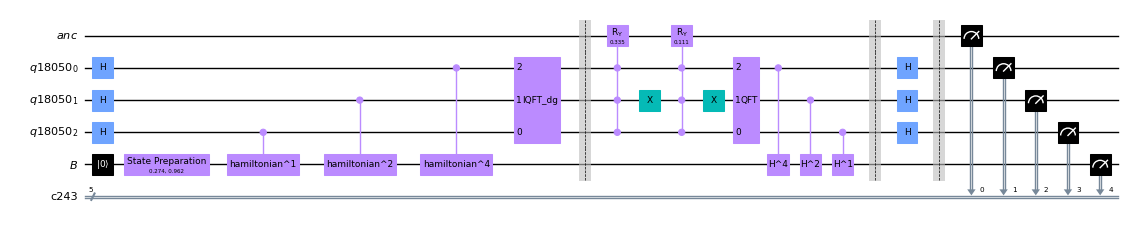

In [2023]:
QC.barrier()
for i in range(5):
    QC.measure(i,i)

QC.draw(output="mpl", scale=0.5, fold=1200)

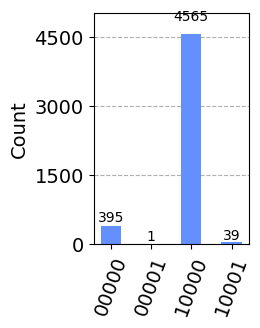

In [2024]:

backend = Aer.get_backend("aer_simulator")
job_sim = backend.run(transpile(QC, backend), shots=5000)

# Grab the results from the job.
result_sim = job_sim.result()
prob_1 = 0
ans = []
plot_histogram(result_sim.get_counts(), figsize=(2,3))

In [2025]:
nshots = 10000
amp_value = {}

for i in range(32,64):
    value = np.round(S[i-32], 10)
    if value:
        amp_value[bin(i)[3:]] = value

for k,v in result_sim.get_counts().items():
    if k[-1] == '1':
        ans.append(amp_value[k])

P1 = sum([i**2 for i in ans])*9

scaling = (C/np.sqrt(P1))
ans = [i/(scaling*np.linalg.norm(ans)) for i in ans]
print (scaling,)
print (ans, )
print (np.dot(ans, A))

(0.5878998450671582+0j)
[(-0.4141854936+0j), (1.6497725058000001-0j)]
[0.27380051+0.j 0.96178651+0.j]
